In [119]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd

## The k-Secretary problem

Another version of the Secretary problem is the case when the administrator has to accept $k$ candidates out of the $n$.
The solution to this new problem should also maximise the probability of recruiting the best candidate, i.e., the chances of having the best ranked candidate among the $k$ chosen.

In [2]:
n = 50
candidates = np.arange(1,n+1)
np.random.shuffle(candidates)

In [3]:
candidates

array([50, 26, 43, 10, 27, 45, 47, 38, 37, 21, 31,  7, 25, 20,  5, 29, 34,
       28, 15, 17,  9,  8,  6, 14,  4, 33, 39,  2,  3, 19, 46, 18, 40, 12,
       41, 32, 16, 48, 49, 42, 36, 44, 23,  1, 30, 35, 24, 13, 11, 22])

## Strategy for $k = 2$

The solution to this problem consists of finding the positions $r_2^*<r_1^*<n$ such that, initially, the first $r_2^*-1$ candidates are rejected and the first cadidate accepted is the next applicant who is better than all the first $r_2^*-1$ interviewed. After the choice of the first candidate, the ones who haven't been interviewed are compared to the first $r_1^*-1$ interviewed, and the second chosen candidate is the next applicant who is better than all the first $r_1^*-1$ interviewed. The steps are the following:

* Reject the first $r_2^*-1$ candidates, and compare the following ones to the best of these rejected
* Choose the first candidate better than the best out of the first $r_2^* - 1$
    * If there is no better candidate, or the chosen candidate is the $n-1$-th interviewed, the two selected candidates are the two last ones
* If you haven't interviewed the first $r_1^*-1$ candidates yet, reject the ones remaining until this position
* Choose the first candidate better than the best out of the first $r_1^* - 1$
    * If there is no better candidate, choose the last one

Gilbert and Mosteller found numerical values for $r_1^*$ and $r_2^*$:

$$
r_1^* - 1 = \frac{n}{e}
$$
$$
r_2^* - 1 = \frac{n}{e^{3/2}}
$$

We see that the value of $r_1^*$ is the same as for the classic secretary problem with $k=1$.

In [120]:
def choose_candidate(n):
    chosen_candidates = []
    candidates = np.arange(1,n+1)
    np.random.shuffle(candidates)

    stop1 = int(round(n/(np.e)**(3/2)))
    stop2 = int(round(n/(np.e)))

    best_to_compare1 = np.min(candidates[:stop1])
    best_to_compare2 = np.min(candidates[:stop2])
    
    for idx1 in range(stop1 + 1, n):
        c = candidates[idx1]
        if c < best_to_compare1:
            chosen_candidates.append(c)
            break

    if idx1 == n-1 or idx1 == n-2 or len(chosen_candidates)==0:
        return list(candidates[-2:])
    

    for idx2 in range(max(stop2+1, idx1+1), n):
        c = candidates[idx2]
        if c < best_to_compare2:
            chosen_candidates.append(c)
            break
    
    if len(chosen_candidates)==1:
        chosen_candidates.append(candidates[-1])
        return chosen_candidates
    
    return chosen_candidates
    

## Simulating the optimal strategy

Now let's simulate 10000 times the problem, with $n=50$ candidates

In [121]:
N = 10_000
n = 50
results = []

for sim in range(N):
    results.append(choose_candidate(n))

In [123]:
res_df = pd.DataFrame(results)
((res_df == 1).sum(axis= 1)).sum()/res_df.shape[0]

0.5628

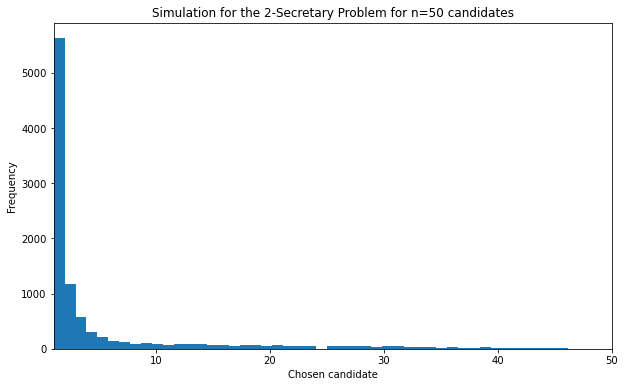

In [125]:
df = res_df.min(axis = 1).sort_values().reset_index(drop=True)
plt.figure(figsize=(10,6))
plt.hist(df, bins=n)
plt.xlim(1,n)
plt.title(f'Simulation for the 2-Secretary Problem for n={n} candidates')
plt.xlabel('Chosen candidate')
plt.ylabel('Frequency')
plt.show()

Most of the times the best candidate (number 1) is chosen and, if not him, there is a high chance of choosing one of the best $10%$ candidates. This can be seen by plotting the cumulative density function of the distribution:

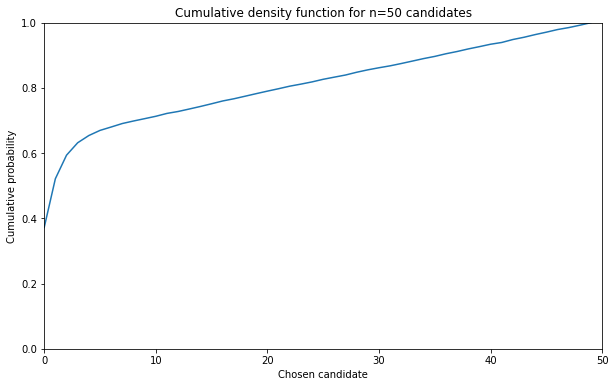

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(np.cumsum(np.histogram(results, bins=n)[0])/N)
plt.ylim(0,1)
plt.xlim(0,n)
plt.title(f'Cumulative density function for n={n} candidates')
plt.xlabel('Chosen candidate')
plt.ylabel('Cumulative probability')
plt.show()